In [1]:
import numpy as np

## 花式索引
Fancy indexing 利用整数数组进行索引

In [2]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i

In [3]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [4]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行：

In [5]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组返回的是一个一维数组，其中的元素对应各个索引元组

In [6]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [7]:
arr[[1,5,7,2],[0,3,1,2]] # 选出的元素是(1,0)(5,3)(7,1)和(2,2)

array([ 4, 23, 29, 10])

选取矩阵的行列子集是矩形区域的方法：

In [8]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

另一个办法是使用np.ix_函数，它将两个一维整数数组转换为一个用于选取方形区域的索引器：

In [9]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**花式索引跟切片不一样，它总是将数据复制到新数组中**

## 数组转置和轴对换
转置（transpose）是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性

In [10]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
# 转置矩阵
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积$X^TX$:

In [12]:
arr = np.random.randn(6,3)
arr

array([[-0.50032833,  1.48271658,  0.19082826],
       [ 1.36849435,  1.04813925, -0.31562511],
       [-0.8754952 ,  0.52513406,  0.4636672 ],
       [ 0.80719622, -0.92678438, -0.07929567],
       [-1.88390737, -0.80401718, -1.23689617],
       [-0.73858487,  0.48462238,  0.39971076]])

In [13]:
np.dot(arr.T,arr)

array([[7.63577741, 0.64143745, 1.03762396],
       [0.64143745, 5.31304189, 1.45729712],
       [1.03762396, 1.45729712, 2.04699052]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置：

In [14]:
arr = np.arange(16).reshape(2,2,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [15]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [16]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

一步步分析axis(0, 1, 2)————>axis(1, 0, 2)的过程：  
原始数组的下标写出来如下：  
```
A = [[[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)],
      [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3)]],
     [[(1, 0, 0), (1, 0, 1), (1, 0 ,2), (1, 0 ,3)],
      [(1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3)]]]
```
接着将每个元组的第一个数和第二个数进行互换：
```
B = [[[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)],
      [(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3)]],
     [[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3)],
      [(1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3)]]]
```
最后在原数组中把B对应的下标的元素写到对应的位置

ndarray还有一个swapaxes方法，他需要接受一对轴编号：

In [17]:
arr.swapaxes(0,1)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

## 通用函数：快速的元素级数组函数
通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。

In [18]:
arr = np.arange(10)

In [19]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [20]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [21]:
x = np.random.randn(8)
y = np.random.randn(8)

In [22]:
x

array([-0.33415589,  0.78254934, -0.05452137, -0.73044454, -0.54957986,
       -0.80708584, -0.24577296,  0.02360042])

In [23]:
y

array([ 0.17779087, -1.47589706, -0.8661129 ,  0.55694467,  1.25452334,
        1.16904324, -1.71914569, -0.98653761])

In [24]:
np.maximum(x,y) # 元素级最大值

array([ 0.17779087,  0.78254934, -0.05452137,  0.55694467,  1.25452334,
        1.16904324, -0.24577296,  0.02360042])

有些ufunc可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，用于浮点数组的小数和整数部分。

In [25]:
arr = np.random.randn(7) * 5

In [26]:
np.modf(arr)

(array([ 0.48723964,  0.71114505,  0.82353242,  0.65426981, -0.14246131,
         0.15255709, -0.16442639]), array([ 6.,  0.,  0.,  9., -4.,  8., -3.]))

## 利用数组进行数据处理
用数组表达式代替循环的做法，通常被称为矢量化。

假设我们想要在一组值（网格型）上计算函数$\sqrt{x^2 + y^2}$。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [27]:
points = np.arange(-5, 5, 0.01) # 1000个间隔相等的点

In [28]:
xs, ys = np.meshgrid(points,points)

In [29]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [30]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

对函数的求值运算，把这两个数组当做两个浮点数那样编写表达式

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [33]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

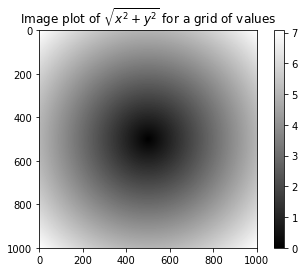

In [34]:
plt.imshow(z, cmap='gray'); plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

## 将条件逻辑表述为数组运算
numpy.where函数是三元表达式x if condition else y的矢量化版本

In [35]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

根据cond中的值选区xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从 yarr中选取。列表推导式的写法如下：

In [36]:
result = [(x if c else y) for x, y, c in zip(xarr,yarr,cond)]

In [37]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题：  
1. 对数组处理速度不是很快（因为所有工作都是由纯Python完成的）。
2. 无法用于多维数组。  

若使用np.where，则可以将该功能写得非常简洁：

In [38]:
 result = np.where(cond, xarr, yarr)

In [39]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个参数和第三个参数不必是数组，它们都可以是标量值。  
假设有一个由随机数据组成的矩阵，将所有正值替换为2，负值替换为-2：

In [40]:
arr = np.random.randn(4, 4)

In [41]:
arr

array([[ 0.87067698, -0.84637754,  1.40912017, -0.07088333],
       [-1.68396578,  0.09727668,  1.49527115,  0.62894775],
       [ 1.04649033,  0.04954822,  0.73764404, -1.92547333],
       [ 1.08137057, -0.15472678,  0.80252774,  0.84460954]])

In [42]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2, -2],
       [-2,  2,  2,  2],
       [ 2,  2,  2, -2],
       [ 2, -2,  2,  2]])

In [43]:
np.where(arr > 0, 2, arr) # 只将正值设置为2

array([[ 2.        , -0.84637754,  2.        , -0.07088333],
       [-1.68396578,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -1.92547333],
       [ 2.        , -0.15472678,  2.        ,  2.        ]])

## 数学和统计方法

In [44]:
arr = np.random.randn(5, 4)

In [45]:
arr.mean()

0.09874342358501684

In [46]:
np.mean(arr)

0.09874342358501684

In [47]:
arr.sum()

1.9748684717003366

In [48]:
arr.sum(axis=1)

array([ 1.17733124,  0.82480235, -2.25988012,  3.5220651 , -1.28945011])

In [49]:
arr.sum(0)

array([ 3.57259941, -1.62958874,  1.36805796, -1.33620016])

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：

In [50]:
arr = np.arange(9).reshape((3, 3))

In [51]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
arr.cumsum(0) # 积累求和

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [53]:
arr.cumprod(1) # 积累乘积

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 用于布尔型数组的方法
在上面这些方法中，布尔值会被强制转换为1（True）和0（False）

In [54]:
arr = np.random.randn(100)

In [55]:
(arr > 0).sum() # 正值的和

54

any用于测试数组中是否存在一个或多个True，而all检查数组中所有值是否都是True

In [56]:
bools = np.array([False, False, True, False])

In [57]:
bools.any()

True

In [58]:
bools.all()

False

## 排序
sort 从小到大

In [59]:
arr = np.random.randn(8)

In [60]:
arr

array([-0.00983361,  0.33645946, -0.99612989, -0.83542806,  0.02444797,
       -1.93439539,  0.37893954, -0.29369565])

In [61]:
arr.sort()

In [62]:
arr

array([-1.93439539, -0.99612989, -0.83542806, -0.29369565, -0.00983361,
        0.02444797,  0.33645946,  0.37893954])

多维数组排序

In [63]:
arr = np.random.randn(5,3)

In [64]:
arr

array([[-0.42829075,  1.19274494, -0.35524091],
       [-2.16968778, -2.43305262,  1.54594614],
       [-0.6553577 ,  1.161502  , -0.71677717],
       [-0.08136455,  1.48439438, -0.49746596],
       [-0.53047721, -0.98260437, -0.5534078 ]])

In [65]:
arr.sort(1)

In [66]:
arr

array([[-0.42829075, -0.35524091,  1.19274494],
       [-2.43305262, -2.16968778,  1.54594614],
       [-0.71677717, -0.6553577 ,  1.161502  ],
       [-0.49746596, -0.08136455,  1.48439438],
       [-0.98260437, -0.5534078 , -0.53047721]])

arr.sort()就地排序，修改数组本身  
顶级方法np.sort()返回数组已排序的副本  
```
sort(a, axis=-1, kind='quicksort', order=None)
Return a sorted copy of an array.
```

In [67]:
arr = np.random.randn(5,3)

In [68]:
arr

array([[-1.23128137, -0.70046562,  0.79107256],
       [-0.071224  , -2.47035151,  0.43228096],
       [ 0.27167588, -0.41475509, -0.55306883],
       [-1.51819492,  3.36908698,  0.5249457 ],
       [ 0.89430066,  1.55909317,  0.22297149]])

In [69]:
np.sort(arr) # axis默认是-1轴

array([[-1.23128137, -0.70046562,  0.79107256],
       [-2.47035151, -0.071224  ,  0.43228096],
       [-0.55306883, -0.41475509,  0.27167588],
       [-1.51819492,  0.5249457 ,  3.36908698],
       [ 0.22297149,  0.89430066,  1.55909317]])

In [70]:
arr

array([[-1.23128137, -0.70046562,  0.79107256],
       [-0.071224  , -2.47035151,  0.43228096],
       [ 0.27167588, -0.41475509, -0.55306883],
       [-1.51819492,  3.36908698,  0.5249457 ],
       [ 0.89430066,  1.55909317,  0.22297149]])

计算数组分位数最简单的办法就是对其进行排序，然后选取特定位置的值：

In [71]:
large_arr = np.random.randn(1000)

In [72]:
large_arr.sort()

In [73]:
large_arr[int(0.05 * len(large_arr))] # 5%分位数

-1.5842136485098506

## 唯一化以及其他的集合逻辑
np.unique用于找出数组中的唯一值并返回已排序的结果

In [74]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [75]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [76]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [77]:
np.unique(ints)

array([1, 2, 3, 4])

拿np.unique等价的纯Python代码来对比一下：

In [78]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [79]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [80]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 将数组以二进制格式保存到磁盘
默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的

In [81]:
arr = np.arange(10)

In [82]:
np.save('som_array', arr)

通过np.load读取磁盘上的数组

In [83]:
np.load('som_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个压缩文件中，将数组以关键字的形式传入即可：

In [84]:
np.savez('array_archive.npz', a=arr, b=arr)

加载.npz时，你会得到一个类似字典的对象，该对象会针对各个数组进行延迟加载：

In [85]:
arch = np.load('array_archive.npz')

In [86]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 线性代数
dot

In [87]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

In [88]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [90]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [91]:
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

一个二维数组跟一个大小合适的数组的矩阵点积运算之后将会得到一个一维数组：

In [92]:
np.dot(x, np.ones(3))

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西

In [93]:
from numpy.linalg import inv, qr

In [94]:
X = np.random.randn(5, 5)

In [95]:
mat = X.T.dot(X)

In [96]:
inv(mat) # 计算矩阵的逆

array([[12.27474213, -4.66444268, -5.46560697, -6.34774316, -4.99452171],
       [-4.66444268,  1.85900479,  2.09335855,  2.39747523,  1.8724908 ],
       [-5.46560697,  2.09335855,  2.82161956,  2.69808139,  2.36997072],
       [-6.34774316,  2.39747523,  2.69808139,  3.7450747 ,  2.8306028 ],
       [-4.99452171,  1.8724908 ,  2.36997072,  2.8306028 ,  2.54662083]])

In [97]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -3.46391290e-15, -3.70007536e-15,
        -5.75934079e-15, -7.49667177e-16],
       [-6.39145695e-15,  1.00000000e+00,  2.85806557e-15,
        -1.80935788e-16,  2.80826757e-15],
       [-9.17530411e-17, -1.37861172e-15,  1.00000000e+00,
        -4.53693276e-15,  7.50726281e-16],
       [ 1.59471438e-15, -1.12011718e-15, -7.33776951e-16,
         1.00000000e+00,  9.86919280e-17],
       [-1.16075949e-15,  2.86981334e-15,  3.77431761e-15,
         3.89700060e-15,  1.00000000e+00]])

In [98]:
q, r = qr(mat) # 计算QR分解

In [99]:
r

array([[ -6.0758717 , -10.11692275,  -2.58309786,  -3.16729699,
          1.47865723],
       [  0.        ,  -7.97849424,   5.26482127,   4.94823083,
         -4.63261148],
       [  0.        ,   0.        ,  -1.7235497 ,  -0.02375582,
          1.85997954],
       [  0.        ,   0.        ,   0.        ,  -2.00304814,
          2.49100727],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.1434943 ]])

## 随机数生成
np.random.normal产生正态（高斯）分布的样本值，可设置均值和标准差，默认为0和1，即标准正态分布。
>normal(loc=0.0, scale=1.0, size=None)  
Draw random samples from a normal (Gaussian) distribution.

np.random.randn可直接产生标准正态分布样本值
>randn(d0, d1, ..., dn)  
Return a sample (or samples) from the "standard normal" distribution.

In [100]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.78597779,  0.44407622, -0.45432059, -1.2150413 ],
       [-0.27553775,  2.3081035 ,  1.87416189, -1.09829824],
       [ 1.77498329, -1.17190738,  0.65748051, -0.05695327],
       [-0.50530394, -0.9467318 , -0.21581828,  0.79698081]])

Python内置的random模块只能一次产生一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级：

In [101]:
from random import normalvariate

In [102]:
N = 1000

In [103]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

934 µs ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
%timeit np.random.normal(size=N)

27.9 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**random.randint和np.random.randint的区别**  
* random.randint(a, b)返回\[a, b]之间的一个整数
>Return random integer in range [a, b], including both end points.

* np.random.randint(low, high=None, size=None, dtype='l')返回[low, high) 之间的整数，且可设置size
>Return random integers from `low` (inclusive) to `high` (exclusive).

## 范例：随机漫步
从0开始，步长1和-1出现的概率相等。  
我们通过内置的random模块以纯Python方式实现1000步的随机漫步：

In [105]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

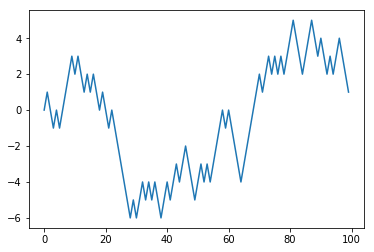

In [107]:
# 根据前100个随机漫步值生成折线图
plt.plot(walk[:100])

这其实是随机漫步中各步的累计和，可以用一个数组运算来实现。用np.random模块一次性随机产生1000个“掷硬币”结果（即两个数中任选一个），将其分别设置为1或-1，然后计算累计和：

In [108]:
nsteps = 1000

In [109]:
draws = np.random.randint(0, 2, size=nsteps)

In [110]:
steps = np.where(draws > 0, 1, -1)

In [111]:
walk = steps.cumsum()

In [112]:
walk.min()

-15

In [113]:
walk.max()

52

np.abs(walk) >= 10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想知道第一个10或-10的索引，可以用argmax来解决，它返回的是改布尔型数组第一个最大值的索引（True就是最大值）  
>Signature: np.argmax(a, axis=None, out=None)  
Docstring:
Returns the indices of the maximum values along an axis.


In [114]:
(np.abs(walk) >= 10).argmax()

265

## 一次模拟多个随机漫步
如果模拟多个随机漫步过程（比如5000个），只需传入一个二元元组，然后求每行的累计和

In [115]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0或1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [116]:
walks

array([[  1,   2,   3, ...,   6,   7,   6],
       [  1,   2,   1, ...,   4,   3,   2],
       [ -1,   0,  -1, ...,  24,  23,  24],
       ...,
       [ -1,  -2,  -1, ...,  -2,  -1,  -2],
       [  1,   2,   3, ..., -10, -11, -10],
       [ -1,  -2,  -3, ...,   8,   7,   8]], dtype=int32)

In [117]:
walks.max()

119

In [118]:
walks.min()

-130

我们来计算30或-30的最小穿越时间。

In [119]:
hits30 = (np.abs(walks) >= 30).any(1)

In [120]:
hits30

array([False, False, False, ..., False, False, False])

In [121]:
hits30.sum()

3457

然后我们利用这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（行），并调用argmax在轴1上获取穿越时间：

In [122]:
cross_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [123]:
cross_times.mean()

502.26525889499567